# **Data Loading**

In [1]:
pip install kagglehub

In [2]:
import kagglehub

path = kagglehub.dataset_download("jp797498e/twitter-entity-sentiment-analysis")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/twitter-entity-sentiment-analysis


In [3]:
import os
print(os.listdir(path))

['twitter_validation.csv', 'twitter_training.csv']


In [4]:
import pandas as pd
df = pd.read_csv(path + "/twitter_training.csv")
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


# **Data Preprocessing**

In [5]:
df.columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Text']
df

,Tweet_ID,Entity,Sentiment,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
df.dropna(subset=['Text'], inplace=True)

# Update x and y after removing NaN values from the DataFrame
x = df['Text'].tolist()
y = df['Sentiment']

print("Shape of df after removing NaNs:", df.shape)
print("Shape of x after removing NaNs:", len(x))
print("Shape of y after removing NaNs:", y.shape)

Shape of df after removing NaNs: (73995, 4)
Shape of x after removing NaNs: 73995
Shape of y after removing NaNs: (73995,)


# **Normalization**

In [7]:
import sklearn.preprocessing as pre
import numpy as np
binr=pre.OneHotEncoder()
y=binr.fit_transform(np.c_[y]).toarray()
y

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [8]:
x=df['Text'].tolist()
x

['I am coming to the borders and I will kill you all,',
 'im getting on borderlands and i will kill you all,',
 'im coming on borderlands and i will murder you all,',
 'im getting on borderlands 2 and i will murder you me all,',
 'im getting into borderlands and i can murder you all,',
 "So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg",
 "So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Here's the original picture compared to the creation I made:) Have fun! pic.twitter.com / mLsI5wf9Jg",
 "So I spent a few hours doing something for fun... If you don't know I'm a HUGE @ Borderlands fan and Maya is one of my fav

# **Tokenization**

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras import preprocessing
from keras.utils import pad_sequences

In [10]:
tokenizer = Tokenizer(num_words=5000)  # Increased vocabulary size
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)
maxlen=10
x=pad_sequences(sequences,maxlen = 10)
x

array([[ 120,  404,    3, ...,  434,   12,   27],
       [ 307,  174,   13, ...,  434,   12,   27],
       [ 307,  404,   13, ..., 1793,   12,   27],
       ...,
       [1347,    4,    2, ...,  118, 1025, 2157],
       [  51,   93,  536, ...,   80,   47, 2157],
       [1347,   19,   12, ...,    2, 1025, 2157]], dtype=int32)

# **Neural Network**

In [11]:
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras.layers import Flatten, Dense, Embedding, LSTM , GRU

In [12]:
from keras.layers import Dropout # Import Dropout

model = Sequential()
model.add(Embedding(5000, 8, input_length=10))
model.add(GRU(64, return_sequences=True))
model.add(Dropout(0.2)) # Add dropout after the first GRU layer
model.add(GRU(32))
model.add(Dropout(0.2)) # Add dropout after the second GRU layer
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2)) # Add dropout after the Dense layer
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(x, y, epochs=20, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - acc: 0.4204 - loss: 1.2440 - val_acc: 0.4603 - val_loss: 1.2826
Epoch 2/20
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - acc: 0.6165 - loss: 0.9578 - val_acc: 0.4589 - val_loss: 1.3694
Epoch 3/20
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - acc: 0.6789 - loss: 0.8388 - val_acc: 0.4485 - val_loss: 1.5053
Epoch 4/20
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - acc: 0.7258 - loss: 0.7372 - val_acc: 0.4392 - val_loss: 1.6970
Epoch 5/20
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - acc: 0.7571 - loss: 0.6675 - val_acc: 0.4415 - val_loss: 1.8238
Epoch 6/20
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - acc: 0.7749 - loss: 0.6163 - val_acc: 0.4233 - val_loss: 1.9931
Epoch 7/20
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - acc: 0.8009 - loss: 0.5534 - val_acc: 0.4290 - val_loss: 2.1582
Epoch 8/20
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - acc: 0.8123 - loss: 0.5142 - val_acc: 0.4169 - val_loss: 2.3610
Epoch 9/20
1850/1850 ━━━

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 10, 8)          │        40,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 10, 64)         │        14,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 192,638 (752.50 KB)

 Trainable params: 64,212 (250.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 128,426 (501.67 KB)

# **Testing and Visualization**

In [14]:
st = input("Enter a sentiment: ")
# Preprocess the input string
sequence = tokenizer.texts_to_sequences([st])
padded_sequence = pad_sequences(sequence, maxlen=maxlen)

# Make the prediction
a = model.predict(padded_sequence)

# Inverse transform the prediction
classes_x = a.round()

# Check if the prediction is all zeros
if np.sum(classes_x) == 0:
    print("Could not determine sentiment for the given input.")
else:
    predicted_sentiment = binr.inverse_transform(classes_x)
    print(predicted_sentiment)

Enter a sentiment: I hate you 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
[['Negative']]


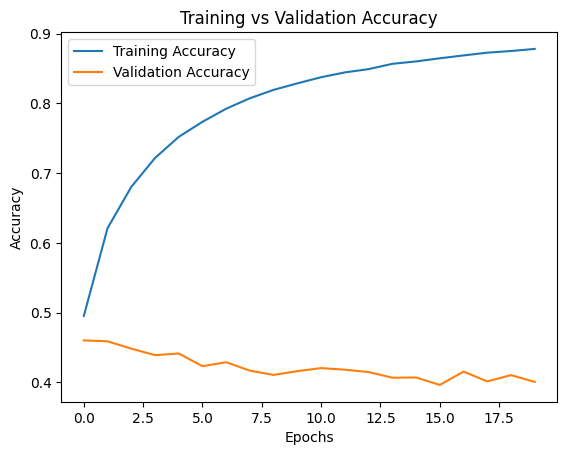

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# **Saving**

In [21]:
import tensorflow.keras
model.save("sentiment analysis model.keras")
